In [1]:
# AdaGrad: 

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("concrete_data.csv")

In [3]:
df.head(3)

,cement_component,furnace_slag,flay_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [4]:
X = df.drop(['concrete_strength'],axis=1).values

y = df['concrete_strength'].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

learningrate = 0.1

m = len(y)

ones = np.ones((m,1)) 
X = np.hstack((ones, X)) 
y = y[:,np.newaxis] 

theta = np.zeros(( X.shape[1],1))

theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [5]:
# AdaGrad

m = len(X)
epochs = 1000
gamma = 0.1 # momentun
eta = 0.1 # Learning rate
eps = 1e-8

v_b,v_w = 0,0

iteration_mom = []
loss_history_mom = []

In [6]:
for epoch in range(10000):
    
    iteration_mom.append(epoch)
    
    # Prediction
    y_pred = np.dot(X,theta)

    # Error
    error = y_pred-y

    # Compute loss function
    cost = np.sum((error)**2,axis=0)[0]

    loss_history_mom.append(cost)
    
    
    # b = theta[:0]
    # w = theta[1:]
    # db = dtheta[:0]
    # dw = dtheta[1:]
    
    # dw += grad_w(x, y)
    # db += grad_b(x, y)
    # v_w += dw**2
    # v_b += db**2
    # w -= (eta / np.sqrt(v_w) + eps) * dw
    # b -= (eta / np.sqrt(v_b) + eps) * db
        

    dtheta = 1/m*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
    
    v_b = v_b + dtheta[:0]**2
    v_w = v_w + dtheta[1:]**2

    theta[:0] = theta[:0] - (eta / np.sqrt(v_b) + eps) * dtheta[:0]
    theta[1:] = theta[1:] - (eta / np.sqrt(v_w) + eps) * dtheta[1:]

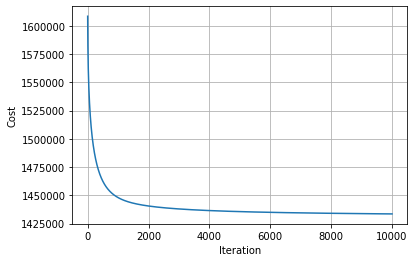

In [8]:
import matplotlib.pyplot as plt
plt.plot(iteration_mom,loss_history_mom)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()